In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('test_scrape_data.csv')

In [4]:
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [5]:
df

,clinic_name,clinic_address_st,clinic_address_city,url,avg_doc_score,avg_clinic_score,clinic_score,doc_score,age,year,success,procedure,diagnosis,income,num_docs,response
0,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,10.0,10,35 - 36,2019 - 2020,Yes,2 IUI,Unexplained,$200K - $499K,1 Doc Seen,"[<div class=""review-question__response"">As a p..."
1,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,8.0,10,32 - 33,2017 - 2018,?,"4 IUI, 2 IVF",Unexplained,$200K - $499K,1st of 2 Docs,"[<div class=""review-question__response"">Dr. Gr..."
2,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,3.0,7,36 - 41,2013 - 2018,14 Eggs Frozen,"1 Egg Freezing, Donor Sperm",—,$100K - $199K,1 Doc Seen,"[<div class=""review-question__response"">Dr. Ke..."
3,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,9.0,9,35 - 36,2019 - 2020,No,3 IUI,Unexplained,$50K - $99K,1 Doc Seen,"[<div class=""review-question__response"">Dr. We..."
4,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,4.0,4,34 - 36,2018 - 2020,No,2 IVF,Unexplained,$200K - $499K,1 Doc Seen,"[<div class=""review-question__response"">Dr. Ho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,10.0,10,38,2018,Yes,4 IVF,—,$100K - $199K,2nd of 2 Docs,"[<div class=""review-question__response"">Dr. Gr..."
131,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,8.0,8,40,2019,5 Eggs Frozen,1 Egg Freezing,Uterine Fibroids,$100K - $199K,1 Doc Seen,"[<div class=""review-question__response"">I woul..."
132,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,10.0,10,36,2019,?,1 Egg Freezing,—,$500K,1 Doc Seen,"[<div class=""review-question__response"">Great ..."
133,NYU Langone Fertility Center,660 1st Avenue,"New York, NY 10016",https://www.fertilityiq.com/fertility-clinic/n...,8.2,8,10.0,10,34,2019,Yes,1 IVF,Unexplained,$100K - $199K,1 Doc Seen,"[<div class=""review-question__response"">Dr. De..."


In [5]:
clean_test = df.response[0].split('</div>')

In [6]:
clean = df.response[0].replace('<div class="review-question__response">',' ').split('</div>')

In [7]:
len(clean)

8

In [6]:
import scrape_reviews as scrape

In [7]:
df_url = pd.read_excel('url_list.xlsx')

In [8]:
list_urls = df_url.URL_List

In [9]:
for i in list_urls:
    print(i)

https://www.fertilityiq.com/fertility-clinic/columbia-university
https://www.fertilityiq.com/fertility-clinic/new-hope-fertility-center
https://www.fertilityiq.com/fertility-clinic/nyu-langone-fertility-center
https://www.fertilityiq.com/fertility-clinic/rma-of-new-york
https://www.fertilityiq.com/fertility-clinic/weill-cornell-medical-college
https://www.fertilityiq.com/fertility-clinic/ccrm-new-york


# Scrape URLS

In [10]:


df = scrape.scrape_urls(list_urls)
len(df)

1262

In [11]:
df.to_csv('new_york_clinic_reviews')

In [13]:
df.response[0]

[<div class="review-question__response">Dr. Rudick is very professional and knowledgeable. She never pushed me to do something I was not ready to do, and let me set the pace of my treatments. When I decided to take a short break between cycles, she was very understanding. She is also very straight forward and matter-of fact with results and reasons for those results, and she doesn't sugar-coat, which I appreciated and which added to my trust of her. When I received bad news after a few cycles back to back, Dr. Rudick sent me a very nice email and I felt that we were  in this together, working toward a common goal. Although Dr. Rudick was not always available at every visit, all of the doctors and nurses at Columbia were pleasant to work with. Before and during each procedure, Dr. Rudick would explain each step in detail, which helped ease my anxiety. I felt very cared for by her and the team at Columbia.</div>,
 <div class="review-question__response">I would tell her that she is in goo

# Clean Data

In [25]:
def remove_text(val):
    text. 

In [6]:
#Convert Text data to string
df['text_string'] = df.response.apply(str)




In [7]:
# Remove htlm text
def remove_html(val):
    return val.replace('<div class="review-question__response">','')
df['text_string'] = df.text_string.apply(remove_html)

# Remove htlm text
def remove_html_div(val):
    return val.replace('</div>','')
df['text_string'] = df.text_string.apply(remove_html_div)

In [8]:
# Remove words from data that are too common
def remove_common_words(val):
    list_of_common_words = ['time','questions','really','ask',
                            'know','patients','think','said','day']
    for i in range(len(list_of_common_words)):
        val = val.replace(list_of_common_words[i],'')
    return val

df['text_string'] = df.text_string.apply(remove_common_words)

In [9]:
df.text_string[0]

"[As a patient, I had an exceptional experience with Dr. DeVore and cannot recommend her highly enough. She is by far the best doctor I have ever been to. There are a few things that  stand out:\n\nI always felt like Dr. DeVore cared about me personally -- she respected my personal values and my comfort zone, and she made recommendations that were tailored specifically to me. \n\nShe is compassionate but also fully candid and honest. She never sugar coated any of the facts, and just as importantly, gave me ALL the information that I needed to feel comfortable about the decisions that we were making. She is extremely thorough in her analysis and detail oriented. I felt empowered and fully understood the process and next steps. After every appointment, I would walk out of the room, feeling like we made the right decisions. Not everything we tried worked out in the beginning, but the decision-making process and information was so clear and upfront, that we were able to pivot as needed. Th

In [12]:
df['text_string'] = df['text_string'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text_string'] = df['text_string'].map(lambda x: x.lower())

In [13]:
df.text_string[0]

"[as a patient i had an exceptional experience with dr devore and cannot recommend her highly enough she is by far the best doctor i have ever been to there are a few things that  stand out:\n\ni always felt like dr devore cared about me personally -- she respected my personal values and my comfort zone and she made recommendations that were tailored specifically to me \n\nshe is compassionate but also fully candid and honest she never sugar coated any of the facts and just as importantly gave me all the information that i needed to feel comfortable about the decisions that we were making she is extremely thorough in her analysis and detail oriented i felt empowered and fully understood the process and next steps after every appointment i would walk out of the room feeling like we made the right decisions not everything we tried worked out in the beginning but the decision-making process and information was so clear and upfront that we were able to pivot as needed the entire iui/ivf pr

In [15]:
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [16]:
# Function to clear scraped data

wpt = nltk.WordPunctTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [17]:
df_test = df.text_string.apply(normalize_document)

In [19]:
df_test[0]

"[ patient exceptional experience dr devore cannot recommend highly enough far best doctor ever things stand : always felt like dr devore cared personally -- respected personal values comfort zone made recommendations tailored specifically compassionate also fully candid honest never sugar coated facts importantly gave information needed feel comfortable decisions making extremely thorough analysis detail oriented felt empowered fully understood process next steps every appointment would walk room feeling like made right decisions not everything tried worked beginning decision - making process information clear upfront able pivot needed entire iui / ivf process extremely complicated piece huge dr devore always went extra mile december dr devore let jan 2020 ' new law meant new york companies would need provide full coverage ivf treatment dr devore extra research guided process even helped follow billing ( insurance ) make sure information needed even wrote personal letter insurance com

In [110]:
df_test[0]

"[ rudick professional ledgeable never pushed something not ready let set pace decided take short break understanding also straight forward matter - fact results reasons results ' sugar - coat appreciated added trust received bad news back back rudick sent nice email felt together working toward common goal although rudick not always available every visit nurses columbia pleasant work procedure rudick would explain step detail helped ease anxiety felt cared team columbia would tell good hands trust process lot ease anxiety understand details risks points seem like no answers trial - - error information gathered lead toward right treated like human rudick patient always available email appointment go made feel like full control process decide aggressive wanted pace wanted proceed several tests diagnosed unexplained infertility frustrating decided try iui first first iui clomid not successful switched letrozole next three iui felt lot better letrozole ( much less bloated ) unfortunately 

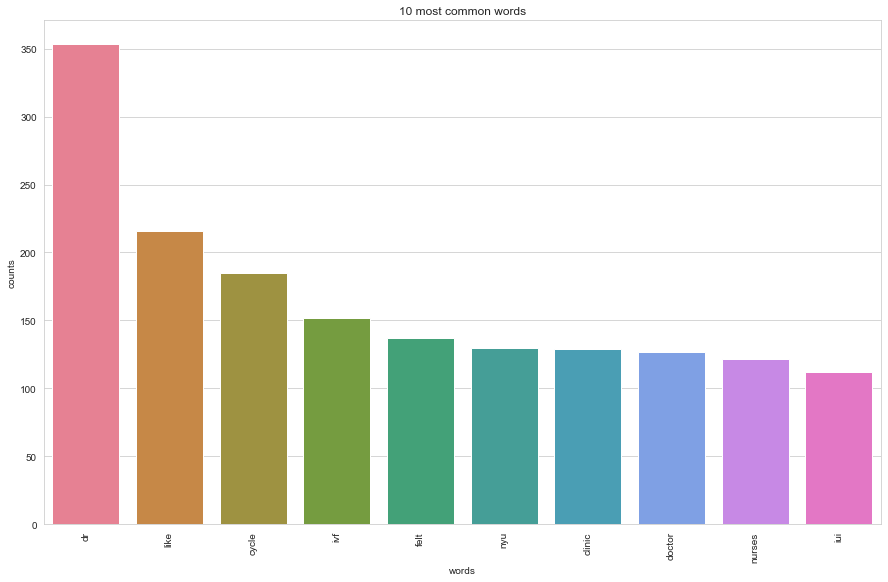

In [20]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_test)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [22]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 6
number_words = 1

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
dr

Topic #1:
doctor

Topic #2:
dr

Topic #3:
noyes

Topic #4:
dr

Topic #5:
dr


In [23]:
number_topics

6

In [24]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    #with open(LDAvis_data_filepath, 'w') as f:
     #   pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
 #   LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

CPU times: user 3.12 s, sys: 204 ms, total: 3.32 s
Wall time: 7.63 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.071859 -0.007491       1        1  43.897158
0      0.063449 -0.010807       2        1  18.837949
2      0.059276 -0.005810       3        1  17.223115
4      0.003063  0.090234       4        1  12.472205
1     -0.055141 -0.093075       5        1   6.663257
3     -0.142505  0.026948       6        1   0.906316, topic_info=        Term        Freq       Total Category  logprob  loglift
996       dr  308.000000  308.000000  Default  30.0000  30.0000
2040   noyes   34.000000   34.000000  Default  29.0000  29.0000
968   doctor  109.000000  109.000000  Default  28.0000  28.0000
1673     ivf  131.000000  131.000000  Default  27.0000  27.0000
1486  honest   34.000000   34.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
447     best    0.326951   42.488669   Topic6  -6.2545  -0.1636
2817   somes    0.308295   28.649967   Topic6  -6.3132   0.1717
842   cycles    0.292868   36.557308   Topic6  -6.3646  -0.1234
1028    easy    0.286055   23.463304   Topic6  -6.3881   0.2965
1381    good    0.283273   64.780536   Topic6  -6.3979  -0.7288

[481 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.945814       01
3         1  0.977385       02
6         1  0.894274       05
10        1  0.894274       08
11        1  0.983540       09
...     ...       ...      ...
3317      2  0.130364  working
3317      3  0.456274  working
3317      4  0.065182  working
3317      5  0.065182  working
3340      4  0.852717  yielded

[819 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 5, 2, 4])

In [94]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

In [95]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.089669 -0.005827       1        1  19.877490
10    -0.089102  0.018994       2        1  16.548782
2     -0.064613  0.069300       3        1  11.649833
7     -0.079799 -0.012813       4        1  10.768070
4     -0.050385  0.024552       5        1   7.905069
8     -0.048403  0.036477       6        1   7.006514
11    -0.078487 -0.042916       7        1   6.977611
6     -0.045456  0.048584       8        1   5.892034
13    -0.039598 -0.099688       9        1   3.482354
14    -0.015626 -0.031512      10        1   3.304548
12     0.050565  0.032300      11        1   1.866777
1      0.021628 -0.036109      12        1   1.799900
9      0.077246 -0.111320      13        1   1.442453
5      0.168664  0.186695      14        1   1.268564
0      0.283036 -0.076718      15        1   0.210002, topic_info=           Term         Freq        Total Category  logprob  loglift
7177   reichman   413.000000   413.000000  Default   30.000  30.0000
6340    pereira   178.000000   178.000000  Default   29.000  29.0000
5154       like  1582.000000  1582.000000  Default   28.000  28.0000
2419      cycle  1367.000000  1367.000000  Default   27.000  27.0000
8840  treatment   885.000000   885.000000  Default   26.000  26.0000
...         ...          ...          ...      ...      ...      ...
2120       cons     0.831454    29.311974  Topic15   -6.146   2.6032
6832       pros     0.831454    31.288393  Topic15   -6.146   2.5380
4281       hope     0.831454   174.371575  Topic15   -6.146   0.8200
6971       rare     0.831454    21.017519  Topic15   -6.146   2.9359
1716     charge     0.831454    27.562021  Topic15   -6.146   2.6648

[1252 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         7  0.725619         005
6        14  0.908342          01
7        14  0.919577          02
8        14  0.827562          03
9        14  0.827562          04
...     ...       ...         ...
9575     10  0.148264       zhang
9575     11  0.160619       zhang
9575     15  0.012355       zhang
9578      7  0.811253   zimmerman
9579     10  0.764947  zimmermann

[3717 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 11, 3, 8, 5, 9, 12, 7, 14, 15, 13, 2, 10, 6, 1])

In [66]:
# Try to clean data more to get more clear topics from data.

count_data

<1262x9629 sparse matrix of type '<class 'numpy.int64'>'
	with 146465 stored elements in Compressed Sparse Row format>

In [25]:
df = pd.read_csv('scraped_reviews.csv')

In [26]:
df

,Unnamed: 0,clinic_name,clinic_address_st,clinic_address_city,avg_doc_score,avg_clinic_score,clinic_score,doc_score,age,year,...,Question 6,Answer 6,Question 7,Answer 7,Question 8,Answer 8,Question 9,Answer 9,Question 10,Answer 10
0,0,Columbia University,5 Columbus Circle,"New York, NY 10019",8.4,8.3,10.0,10,33,2019,...,Describe your experience with Columbia Univers...,"The clinic has a very calming atmosphere, and ...",Describe the costs associated with your care u...,"Fortunately, I had fertility coverage under my...",Describe Briana Rudick's approach to eSET (ele...,Dr. Rudick recommended transferring one embryo...,NaN,NaN,NaN,NaN
1,1,Columbia University,5 Columbus Circle,"New York, NY 10019",8.4,8.3,10.0,10,38,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Columbia University,5 Columbus Circle,"New York, NY 10019",8.4,8.3,10.0,10,33 - 35,2018 - 2020,...,Describe the costs associated with your care u...,Insurance covered the cost,Describe Eric Forman's approach to eSET (elect...,I trusted Dr. Forman's suggestion on transferr...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Columbia University,5 Columbus Circle,"New York, NY 10019",8.4,8.3,10.0,10,32 - 33,2019 - 2020,...,Describe your experience with Columbia Univers...,Columbia is gorgeous! Everything is clean and ...,Describe the costs associated with your care u...,I have amazing insurance as a teacher so every...,Describe Eric Forman's approach to eSET (elect...,I always wanted to have one child at a time an...,NaN,NaN,NaN,NaN
4,4,Columbia University,5 Columbus Circle,"New York, NY 10019",8.4,8.3,8.0,10,38 - 39,2019 - 2020,...,Describe your experience with Columbia Univers...,"The facilities at Columbia IVF are clean, well...",Describe your experience with your monitoring ...,Monitoring appointments were scheduled for a s...,Describe the costs associated with your care u...,"PGS\t$2,500, Cyropreservation (annual) $1,200,...",Describe Paula Brady's approach to eSET (elect...,"We only had one good embryo, so we did not hav...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,2029,University of Pennsylvania Penn Fertility Care,3701 Market St.,"Philadelphia, PA 19104",8.3,7.9,9.0,10,35,2018,...,Describe your experience with University of Pe...,Strength the office is convient and they vali...,Describe the costs associated with your care u...,Around 9k,Describe Kurt Barnhart's approach to eSET (ele...,He only does 1 embryo . He said multiple is to...,NaN,NaN,NaN,NaN
2030,2030,University of Pennsylvania Penn Fertility Care,3701 Market St.,"Philadelphia, PA 19104",8.3,7.9,10.0,10,33,2017,...,Describe the costs associated with your care u...,I had full coverage for 2 egg retrieval and 2 ...,Describe Samantha Butts's approach to eSET (el...,They allowed me to do a 2 embryo transfer for ...,What specific things went wrong at University ...,"[<ul class=""reviewer-clinic-fails__list""><li c...",NaN,NaN,NaN,NaN
2031,2031,University of Pennsylvania Penn Fertility Care,3701 Market St.,"Philadelphia, PA 19104",8.3,7.9,NaN,10,29,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2032,2032,University of Pennsylvania Penn Fertility Care,3701 Market St.,"Philadelphia, PA 19104",8.3,7.9,10.0,10,35 - 36,2012 - 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['Question 3'][0]

'During treatment, were you treated like a number or a human with Briana Rudick at Columbia University?'

In [33]:
df['Answer 3'][0]

'I was treated like a human, Dr. Rudick was very patient with me, and was always available by email or by appointment to go through all of my questions. She made me feel like I had full control over the process, and that it was up to me to decide how aggressive I wanted to be, and the pace at which I wanted to proceed.'